CHURN ANALYSIS AND PREDICTION MODEL OF Telecom customer churn data (From Kaggle)

LOADING AND CLEANING THE DATA

In [1]:
import pandas as pd

In [2]:
#Loading the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Making sure there are no blank spaces in TotalCharges column as it is stored as object

In [8]:
df[df["TotalCharges"] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


11 columns had blank/spaces, To fix that we would change it to numeric data type and spaces will be taken as NaN

In [9]:
#Apparently We do have some rows that has missing values for the TotalCharges cloumn
#so we need to fix that as isnull() function does not consider blank as null value

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce") #coerec convert nom numeric value like spaces to NaN

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now we need to fill the 11 Null values with some relevant data, and filling it with median of the column is the safest option

In [11]:
#Filling missing values with meidan, safest option as removing these rows might not be a good option

df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5012\1538955422.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace = True)


In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [14]:
df["TotalCharges"].dtype

dtype('float64')

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Categorical Distribution of all the columns, it will come in handy when we need to encode them to numeric data.
So far we have only 4 numeric data column - SeniorCitizen, MonthlyCharges, TotalCharges and Tenure

In [16]:
#checking distribution of categorical columns

for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: \n{df[col].value_counts()}\n")

Unique values in customerID: 
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
4501-VCPFK    1
6075-SLNIL    1
             ..
1452-KIOVK    1
6713-OKOMC    1
7892-POOKP    1
6388-TABGU    1
9763-GRSKD    1
Name: count, Length: 7043, dtype: int64

Unique values in gender: 
gender
Male      3555
Female    3488
Name: count, dtype: int64

Unique values in Partner: 
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Unique values in Dependents: 
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Unique values in PhoneService: 
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Unique values in MultipleLines: 
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Unique values in InternetService: 
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Unique values in OnlineSecurity: 
OnlineSecurity
No                     3498
Yes           

EDA STARTS FROM HERE

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

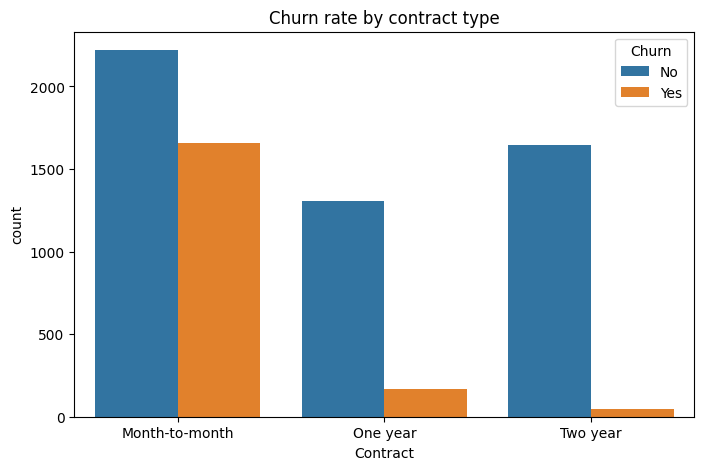

In [18]:
#Churn VS Contract type plot

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn rate by contract type")
plt.show()

By the above graph we can see that, month-to-month contract types users churns significantly more as compared to other contract types

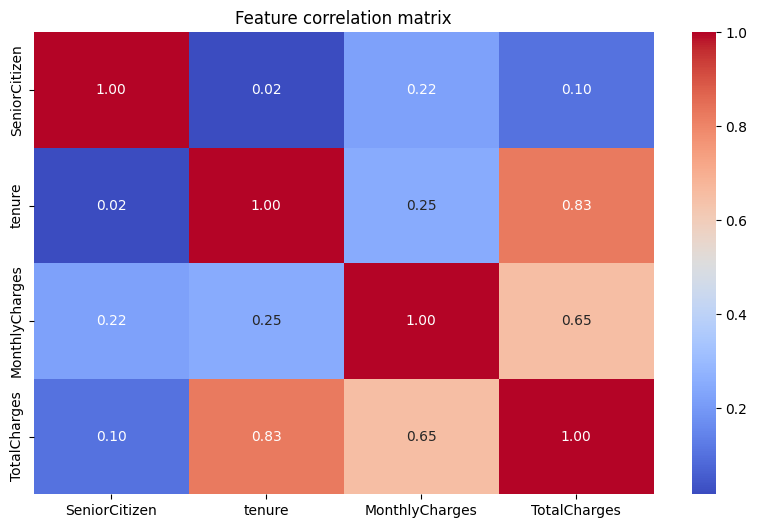

In [19]:
#Calculating correlation matrix for the numeric columns of the dataset
#Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature correlation matrix")
plt.show()

From above correlation matrix we can see that there is good correlation between tenure and TotalCharges which is self explainatory that more time of using services would generate more charges

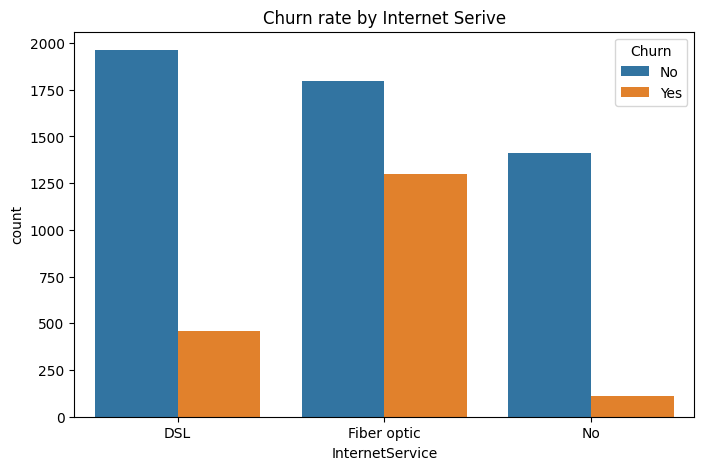

In [20]:
#Churn VS Internet service plot

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.title("Churn rate by Internet Serive")
plt.show()

From above, we can interpret that users with fiber optic internet services churns more.

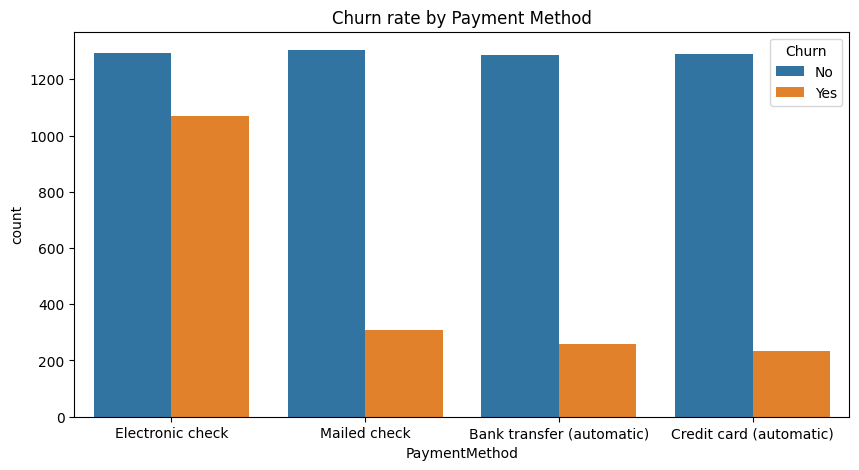

In [21]:
#Churn VS Payment method plot

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="PaymentMethod", hue="Churn")
plt.title("Churn rate by Payment Method")
plt.show()

users with payment method as electronic check churns more as we can see from graph above

In [25]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

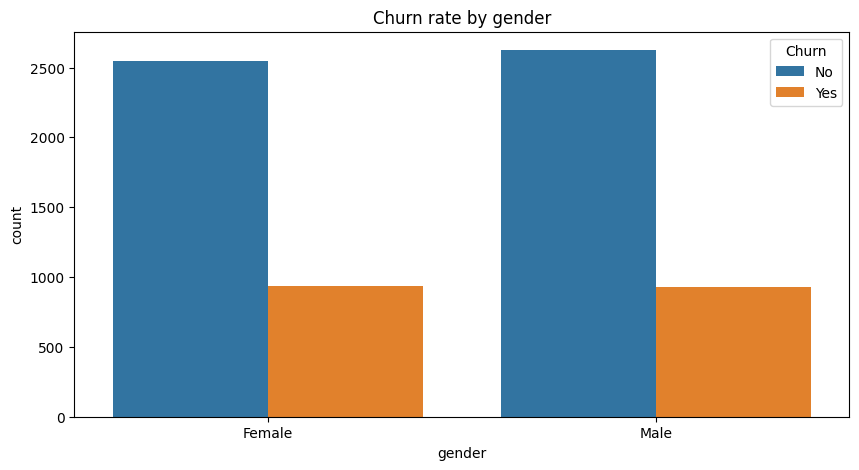

In [22]:
#Chrun VS gender plot

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="gender", hue="Churn")
plt.title("Churn rate by gender")
plt.show()

We can see that gender as no whatsover impact of churning, both gender as churning with same rate

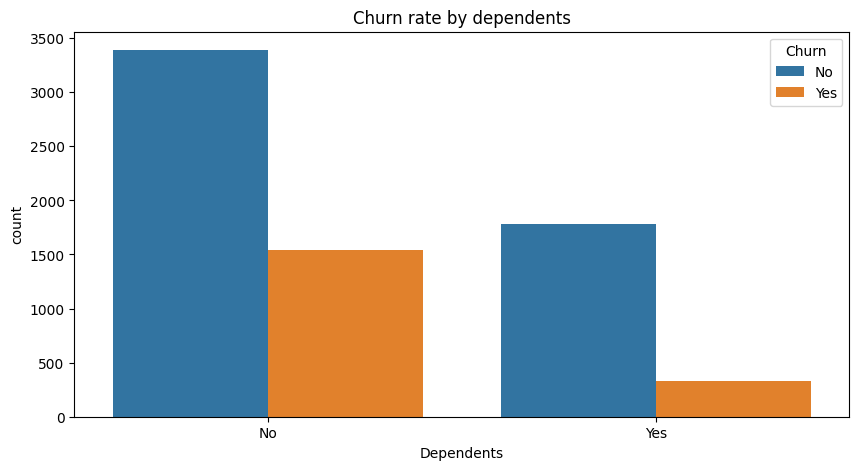

In [23]:
#Churn VS dependents plot

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Dependents", hue="Churn")
plt.title("Churn rate by dependents")
plt.show()

Users with no dependents churn more, obvious as users with dependents prefer more stability

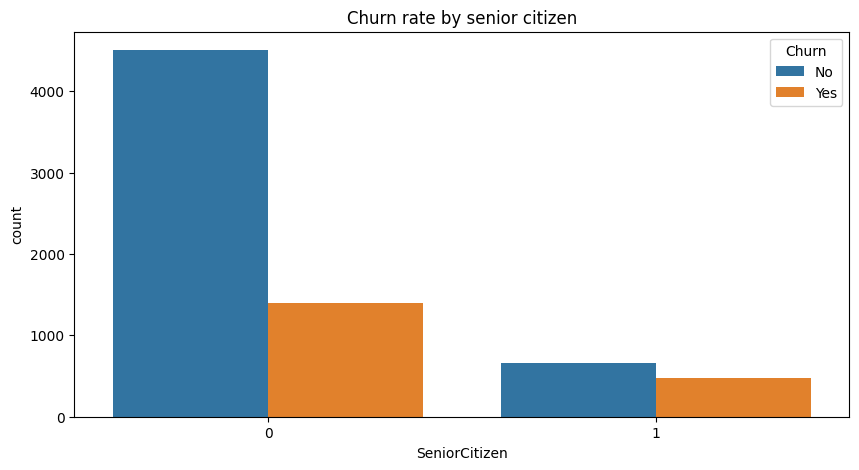

In [24]:
#Churn VS senior citizen plot
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="SeniorCitizen", hue="Churn")
plt.title("Churn rate by senior citizen")
plt.show()

Senior citizens churns less as compared to other users

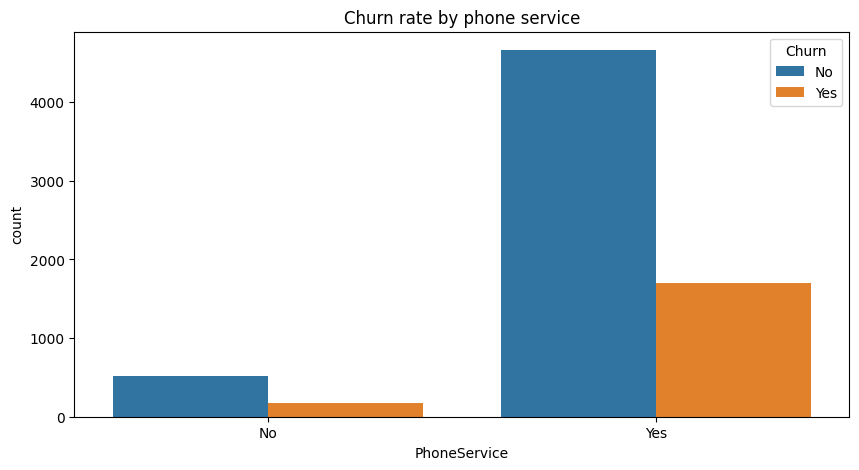

In [25]:
#Churn VS Phone service plot
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="PhoneService", hue="Churn")
plt.title("Churn rate by phone service")
plt.show()

Users with phone servives churns more significantly

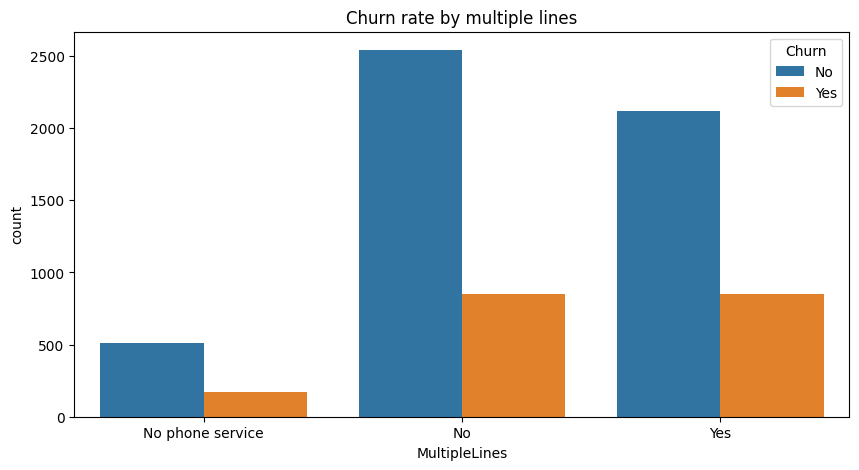

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="MultipleLines", hue="Churn")
plt.title("Churn rate by multiple lines")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5012\2752586626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette=['blue', 'red'])


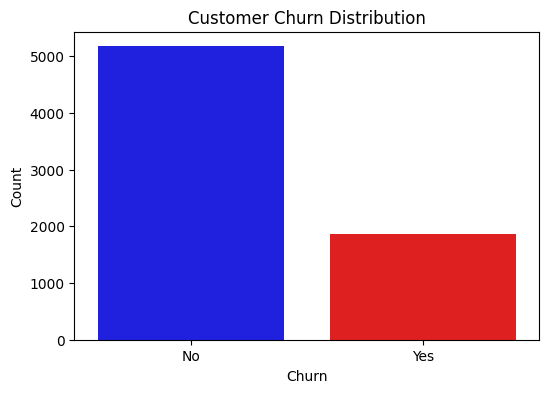

In [27]:
# Countplot for churn distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette=['blue', 'red'])
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_5012\1342142671.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=['blue', 'red'])


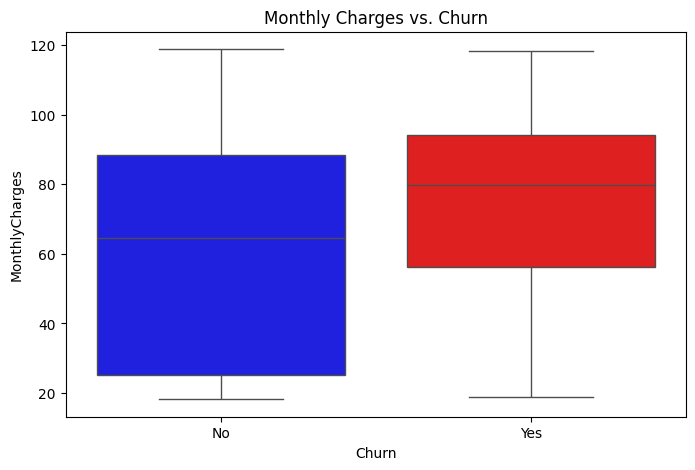

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=['blue', 'red'])
plt.title("Monthly Charges vs. Churn")
plt.show()

In [32]:
#Creating a new column that counts the number of services each customer has
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convert 'No' to 0 and 'Yes' to 1, then sum
df['TotalServices'] = df[service_cols].apply(lambda x: (x == 'Yes').sum(), axis=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5012\865094780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['TotalServices'], y=df['tenure'], palette='coolwarm')


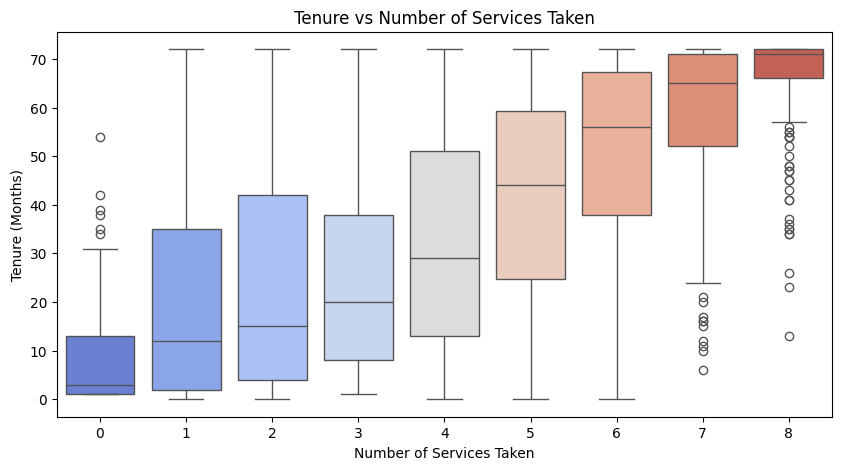

In [33]:
#Box plot for churn VS total number of services taken by customer
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['TotalServices'], y=df['tenure'], palette='coolwarm')
plt.xlabel('Number of Services Taken')
plt.ylabel('Tenure (Months)')
plt.title('Tenure vs Number of Services Taken')
plt.show()

Customers with less number of services churns more

In [34]:
#Ensure 'Churn' is mapped to numeric values (1 = churned, 0 = not churned)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [35]:
# Compute churn rate per service count
churn_rates = df.groupby('TotalServices')['Churn'].mean() * 100 

C:\Users\DELL\AppData\Local\Temp\ipykernel_5012\4170032421.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='coolwarm')


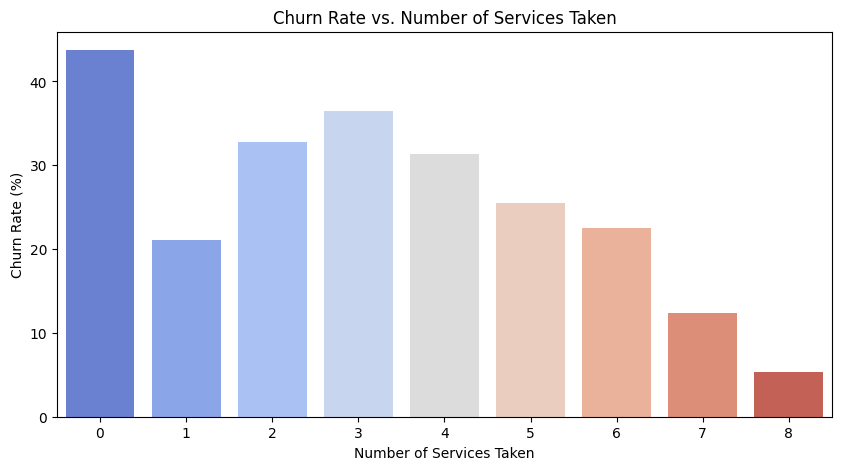

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='coolwarm')
plt.xlabel("Number of Services Taken")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate vs. Number of Services Taken")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5012\3791029871.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Churn")


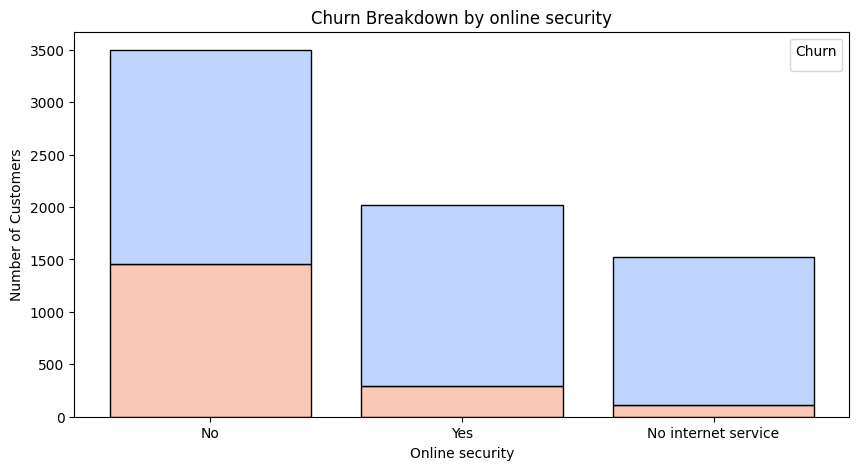

In [37]:
# Set figure size
plt.figure(figsize=(10, 5))

# Create stacked bar chart
sns.histplot(data=df, x="OnlineSecurity", hue="Churn", multiple="stack", shrink=0.8, palette="coolwarm")

# Labels & Title
plt.xlabel("Online security")
plt.ylabel("Number of Customers")
plt.title("Churn Breakdown by online security")
plt.legend(title="Churn")
plt.show()

Users with No online security churns more

C:\Users\DELL\AppData\Local\Temp\ipykernel_5012\289483827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')


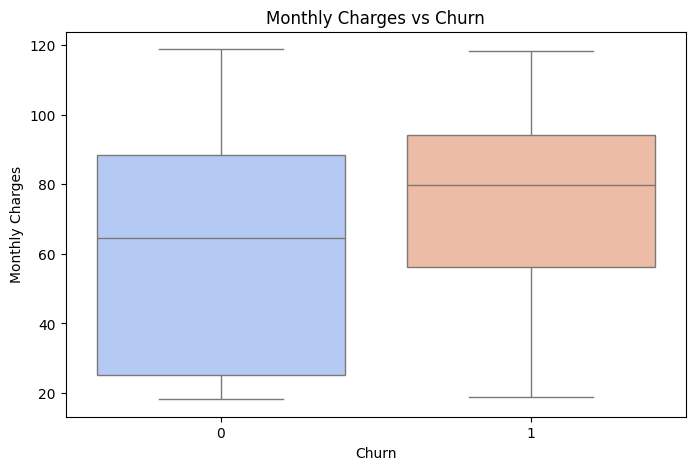

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4508\1240646784.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==1]['MonthlyCharges'], label='Churned', shade=True, color='red')
C:\Users\DELL\AppData\Local\Temp\ipykernel_4508\1240646784.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==0]['MonthlyCharges'], label='Not Churned', shade=True, color='blue')


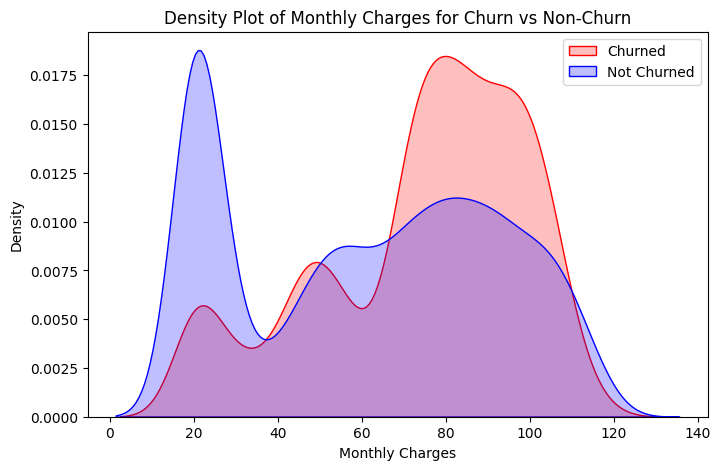

In [45]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['Churn']==1]['MonthlyCharges'], label='Churned', shade=True, color='red')
sns.kdeplot(df[df['Churn']==0]['MonthlyCharges'], label='Not Churned', shade=True, color='blue')
plt.title('Density Plot of Monthly Charges for Churn vs Non-Churn')
plt.xlabel('Monthly Charges')
plt.legend()
plt.show()

More monthly charges more churning

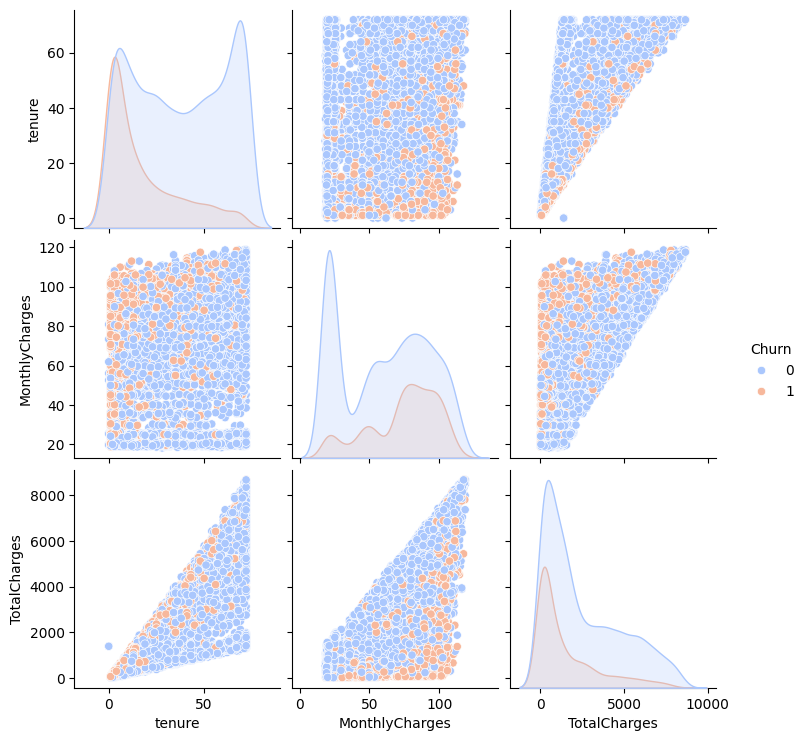

In [39]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', palette='coolwarm')
plt.show()

FINAL INSIGHTS FROM DATA:
Based on the analysis, we can conclude that certain user behaviors and characteristics significantly influence churn rates. Users with month-to-month contracts, fibre optic internet services, and those who use electronic check payment methods tend to churn at higher rates. Additionally, individuals without dependents, who are not senior citizens, and users who subscribe to fewer services are more likely to leave. Furthermore, those without online security and those who face higher monthly charges also show increased churn. Finally, users with phone services exhibit a notably higher churn rate. These factors combined highlight that a lack of stability, lower service offerings, higher costs, and certain payment preferences are key indicators of users who are more likely to churn.

Converting all the data except customerId to numeric data so that we can implemnet some prediaction models for churning
Label encoding - for binary categorical columns
One hot encoding - for multi categorical columns

In [40]:
from sklearn.preprocessing import LabelEncoder

#LABEL ENCDING
# List of binary categorical columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Encoding binary categorical columns
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL             No  ...   
1             1                No             DSL            Yes  ...   
2             1                No             DSL            Yes  ...   
3             0  No phone service             DSL            Yes  ...   
4             1                No     Fiber optic             No  ...   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month           

In [41]:
#One hot encoding
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                                 'Contract', 'PaymentMethod'], drop_first=True)

print(df.head())  # Checking if encoding worked

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0            False                            False            False   
1       

In [42]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns that need scaling
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
df[num_cols] = scaler.fit_transform(df[num_cols])


Splitting the dats for tarining ans testing the model (80-20)

In [43]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['customerID', 'Churn'])  # Dropping ID & Target
y = df['Churn']  # Target variable

# Splitting dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (5634, 31), Testing set: (1409, 31)


Logistic Rgegression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

# Evaluate Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8055358410220014

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



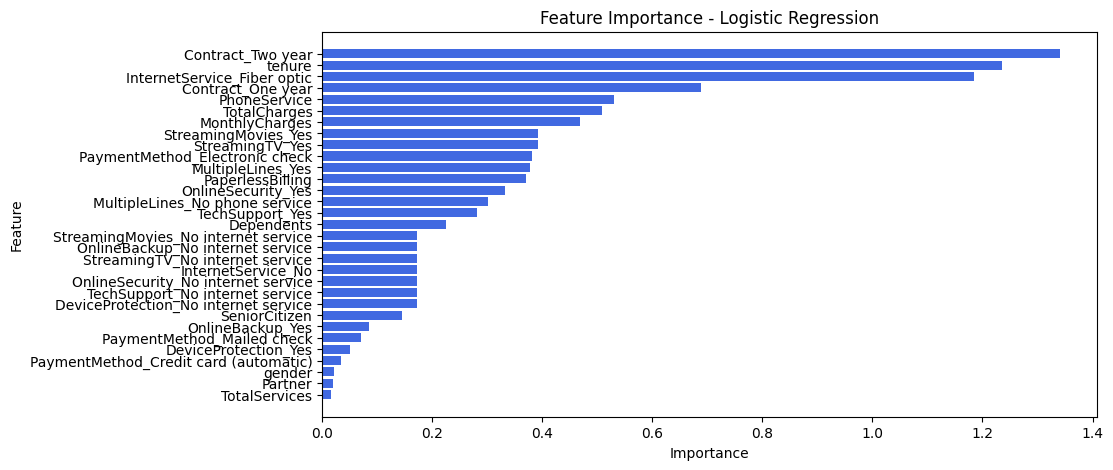

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(log_model.coef_[0])  # Taking absolute values
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

Random forest classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}\n")

# Print classification report
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.78708303761533

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



C:\Users\DELL\AppData\Local\Temp\ipykernel_5012\2765215988.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.Importance, y=feature_importance.Feature, palette="viridis")


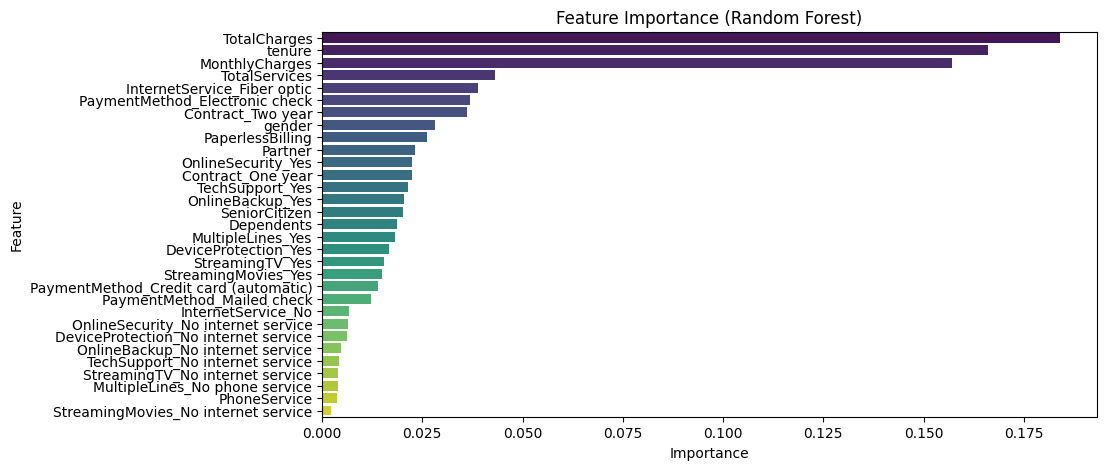

In [49]:
# Get feature importances from Random Forest model
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance.Importance, y=feature_importance.Feature, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

Logistic Rgression with hyperparameter tuning, but did not see any significant increase in performance.

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'penalty': ['l1', 'l2']
}

# Initialize Logistic Regression model
logreg = LogisticRegression()

# Apply Randomized Search
random_search = RandomizedSearchCV(logreg, param_distributions=param_grid, 
                                   n_iter=20, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate on test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\DELL\AppData\L

Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': np.float64(1438.44988828766)}
Tuned Model Accuracy: 0.8062455642299503
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


More customers stay than churn, but the churn rate is significant.
Insight: - If 20-30% of customers are leaving, the company must invest in retention strategies.
         - Understanding why they leave (pricing, contract issues, customer service) is key.
Recommendation: - Loyalty discounts for long-term customers.
                - Exit surveys to understand customer pain points.

Higher monthly charges correlate with higher churn.
Insight: - Customers paying higher fees are more likely to leave.
         - This suggests pricing dissatisfaction or lack of perceived value.
Recommendation: - Offer tiered pricing plans (discounts for longer contracts).
                - Introduce personalized discounts for high-value customers at risk of churn.

Top churn drivers:
Contract type (month-to-month customers churn more)
Monthly charges (higher = more churn)
Tech support availability (lack of support = higher churn)

Insight: - Month-to-month customers are at the highest risk of leaving.
         - Customers without tech support are more likely to churn.
Recommendation: - Encourage yearly contracts with incentives (discounts, perks).
                - Improve customer service & tech support to increase retention.
